## continuacion con Crank-Nicholson


La matriz queda


\begin{eqnarray}
\begin{pmatrix}
1 + 2 \beta & -\beta & 0 & \cdots & \cdots & 0 \\
-\beta & 1 + 2 \beta & -\beta &  \ddots & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots  & \ddots & \ddots & \ddots & \ddots &  \vdots  \\
0 & \cdots & \cdots & 0 & -\beta & 1 + 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j+1} \\ w_{2 j+1} \\ \vdots \\ w_{n-2 j+1} \\ w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \beta & \beta & 0 & \cdots & \cdots & 0 \\
\beta & 1 - 2 \beta & \beta &  \ddots & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots  & \ddots & \ddots & \ddots & \ddots &  \vdots  \\
0 & \cdots & \cdots & 0 & \beta & 1 - 2 \beta
\end{pmatrix}
+ \beta
\begin{pmatrix}
w_{0 j+1} + w_{0j} \\ 0 \\0 \\ \vdots \\ 0 \\ w_{nj} + w_{n j+1}
\end{pmatrix}
\end{eqnarray}

In [1]:
# implementacion
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg


def solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f):
    # defina variables
    L = float(b-a)
    dx = L/(nx-1)
    beta=0.5*alpha*dt/dx**2

    tmax=nt*dt + t0
    t=np.arange(t0, tmax, dt)

    # inicialice w
    w = np.zeros((nx, nt))
    X=np.linspace(a, b, nx)

    print("dimensiones de w", w.shape)

    # condiciones de frontera
    for j in range(nt):
        w[0, j] = 0
        w[nx-1, j] = 0

    # vcector de la derecha
    rhs = np.zeros(nx-2)

    # inicializacion de A, B, b
    A = np.zeros([nx-2, nx-2])
    B = np.zeros([nx-2, nx-2])
    b = np.zeros(nx-2)

    # condicion inicial
    w[:, 0] = np.asarray([f(xx) for xx in X]) #previously np.array()

    # lleno de matrices A,B
    # OJOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
    for i in range(nx-2):  # had a range(1:nx-2)
        A[i][i] = 1.0 + 2*beta
        B[i][i] = 1.0 - 2*beta
        if i>0 :
            A[i][i-1] = -beta
            B[i][i-1] = beta
        if i<nx-3:
            A[i][i+1] = -beta
            B[i][i+1] = beta
        b[0] = beta*(w[0,1] + w[0,0])
        b[nx-3] = beta*(w[nx-1, 1] + w[nx-1,0])

        rhs = B.dot(w[1:-1, 0]) + b

    # print matrices A, B, b for verification
    print("A", A)
    print('\n'*4)
    print("B", B)
    # ciclo sobre tiempos
    for j in range(0, nt-1):

        # resuelve Au_w j+1 = B w_j
        x = linalg.solve(A, rhs)

        # actualiza w
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

        b[0] = beta*(w[0,j+1] + w[0,j])
        b[nx-3] = beta*(w[nx-1,j] + w[nx-1,j+1])

    return w







In [2]:
# prueba
alpha=1
a=0
b=1
nt=40001
nx=101
dt=0.00001
t0=0
x0=0
L=b-a

def f(x):
    return 6*np.sin(np.pi*x/L)

w=solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)

dimensiones de w (101, 40001)
A [[ 1.1  -0.05  0.   ...  0.    0.    0.  ]
 [-0.05  1.1  -0.05 ...  0.    0.    0.  ]
 [ 0.   -0.05  1.1  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.1  -0.05  0.  ]
 [ 0.    0.    0.   ... -0.05  1.1  -0.05]
 [ 0.    0.    0.   ...  0.   -0.05  1.1 ]]





B [[0.9  0.05 0.   ... 0.   0.   0.  ]
 [0.05 0.9  0.05 ... 0.   0.   0.  ]
 [0.   0.05 0.9  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.9  0.05 0.  ]
 [0.   0.   0.   ... 0.05 0.9  0.05]
 [0.   0.   0.   ... 0.   0.05 0.9 ]]


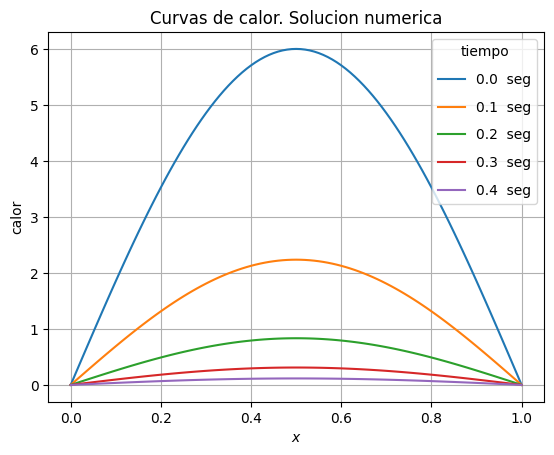

In [3]:
# graficar
params={'legend.fontize':5, 'legend.handlength':1}

Ndt=10000
plt.xlabel(r"$x$")
plt.ylabel(r"calor")
plt.title(r'Curvas de calor. Solucion numerica')

X = np.linspace(a, b, nx)

for j in range(0,nt,Ndt):
    t=j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()

## Error con respecto a la solucion analitica

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L}  \right ) \mathrm{e}^{-\frac{1}{\alpha} \left (  \frac{\pi}{L} \right )^2 t}$$

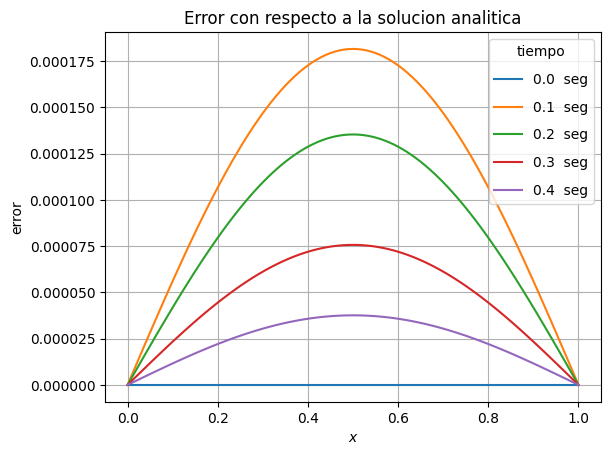

In [5]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-1/alpha*(np.pi/L)**2*t)

# parametros
nt=40001
nx=101
dt=0.00001
t0=0
x0=0
L=b-a
step=10000
Nt = int(nt/step)+1
dx = L/(nx-1)
alpha=1
error = np.zeros((nx,Nt))
k=0

for j in range(0,nt,step):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j]-u(x,t)
    k+=1

# graficamos el error
params={'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel(r"error")
plt.title(r'Error con respecto a la solucion analitica')

X = np.linspace(0, L, nx)
Dt=0.1

for j in range(0, Nt):
    t=j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1)) + '  seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()


Recuerden que Crank-Nicholson es incondicionalmente estable. Pero eso no quiere decir que intervalos de tiempo grandes no produzacan error



dimensiones de w (101, 5)
A [[1001. -500.    0. ...    0.    0.    0.]
 [-500. 1001. -500. ...    0.    0.    0.]
 [   0. -500. 1001. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1001. -500.    0.]
 [   0.    0.    0. ... -500. 1001. -500.]
 [   0.    0.    0. ...    0. -500. 1001.]]





B [[-999.  500.    0. ...    0.    0.    0.]
 [ 500. -999.  500. ...    0.    0.    0.]
 [   0.  500. -999. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -999.  500.    0.]
 [   0.    0.    0. ...  500. -999.  500.]
 [   0.    0.    0. ...    0.  500. -999.]]


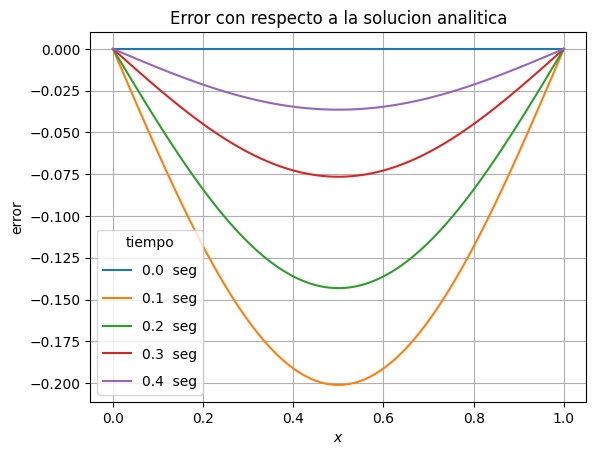

In [6]:
nt=5
dt=0.1
dx=(b-a)/(nx-1)
alpha=1
w = solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)

error = np.zeros((nx,nt))
k=0
for j in range(nt):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j]-u(x,t)

    k+=1


# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel(r"error")
plt.title(r'Error con respecto a la solucion analitica')

X = np.linspace(0, L, nx)
for j in range(Nt):
    t=j*dt
    plt.plot(X, error[:,j], label=str(round(t,1)) + '  seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()


## Metodo Leap-Frog (salto de rana)
El leap-frog es un esquema central en tiempo y central en espacio.

$$\frac{w_{i j+1} - w_{i j-1}}{\Delta t}  = \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}$$
El error es de $\mathcal{O}(\Delta x^2)$  y  $\mathcal{O}(\Delta t^2)$

Despejamos el termino en $j+1$

$$w_{i j+1} = \gamma ( w_{i+1 j} -2 w_{ij} + w_{i-1 j}) w_{i j_1} $$
donde $\gamma = \Delta t \alpha/\Delta x^2$

Observe que se necesitan dos capas de tiempo cada vez (ayer y antier para calcular el hoy) $t_0, t_1$ de aca se arranca.

Dejo de tarea implementar este algoritmo con las condiciones de Newmann.





# Acerca de los nombres para los diferentes metodos.

Veamos unas expresiones relacionadas al problema

$u_t= f(x,t)$
En forma integral


\begin{eqnarray}
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x,t) \quad , \quad \text{evaluacion en el punto izquierdo} \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x,t+ \Delta t) \quad , \quad \text{evaluacion en el punto izquierdo} \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \frac{\Delta t}{2} ( f(x,t) +  t\Delta t f(x,t)) \quad , \quad \text{promedio de las dos anteriores } \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x,  t  + \Delta t/2) \quad , \quad \text{evaluacion en el centro}
\end{eqnarray}



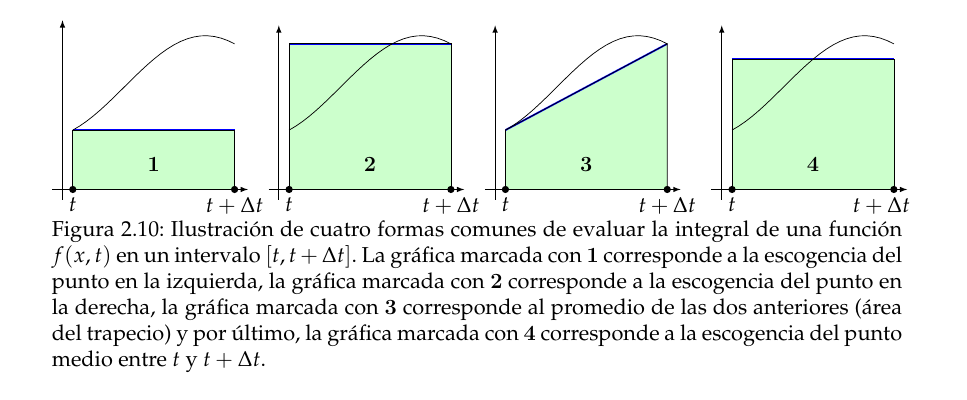

Recuerden, del teorema central del calculo (Newton)

$$\int_{t}^{t + \Delta t} u_t(x, \tau) d \tau = u(x, t+ \Delta t)- u(x,t) $$

Escribamos

\begin{eqnarray}
\frac{ u(x, t + \Delta t) - u(x,t)}{\Delta t} &\approx& f(x,t) \quad  , \quad \text{FTCS} \\
\frac{ u(x, t + \Delta t) - u(x,t)}{\Delta t} &\approx& f(x,t+ \Delta t) \quad  , \quad \text{BTCS} \\
\frac{ u(x, t + \Delta t) - u(x,t)}{\Delta t} &\approx& \frac12 ( f(x,t)  + f(x , t + \Delta t)) \quad  , \quad \text{Crank-Nicholson} \\
\frac{u(x, t + \Delta t/2) - u(x, t - \Delta t/2)}{\Delta t} &\approx& f(x, t + \Delta t/2) \quad, \quad \text{Leapfrog}
\end{eqnarray}

# Ecuacion hiperbolicas.
La canonica es la ecuacion de onda en el intervalo $[a,b]$.


\begin{eqnarray}
\begin{cases}
u_{xx} - \frac{1}{c^2(x)} u_{tt} = - g(x,t) \\
u(a,t)=e(t)  \quad , \quad u(b,t) = f(t) \quad : \quad \text{condiciones de frontera} \\
u(x,t_0) = p(x)  \quad  , \quad u_t(x, t_0) = q(x) \quad , \quad \text{condiciones iniciales}
\end{cases}
\end{eqnarray}

Usaremos las derivadas centrales tanto en espacio como en tiempo.

$$ \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} - \frac{1}{c^2(x)} \frac{w_{i j+1} - 2 w_{ij} + w_{i j-1}}{\Delta t^2} = - g_{ij} \tag{1} $$
donde



Los errores donde $\mathcal{O}(\Delta t^2) $
y  $\mathcal{O}(\Delta x^2) $

Ahora $g_{ij} = g(x_i, t_j)$, $c_i=c(x_i)$ , $x_i=x_0 + i \Delta x$, $t_j = t_0 + j \Delta t$ y $w_{ij}=u(x_i, t_j)$.

## Comenzamos con las condiciones de frontera
$$ w_{0j} = e(t_j) = e_j  \quad , \quad w_{nx j} = f(t_j) = f_j$$
ademas
$$ w_{i0} = p(x_i)= p_i \quad, \quad \text{inicial} $$

En la derivada

$$\frac{w_{i1} - w_{i, -1}}{2 \Delta t}= q(x) + \mathcal{O}(\Delta x^2)$$

De aca (despejando $w_{i, -1}$

$$w_{i, -1} = w_{i1} - 2 q_i \Delta t \tag{1a} $$



Despejamos $w_{i j+1}$ de la expresion
Llamando $\gamma_i= c_i \Delta t/\Delta x$

$$w_{i j+1} = \gamma_i^2 ( w_{i+1 j} - 2 w_{ij} + w_{i-1 j}) + 2 w_{ij} - w_{i j-1} + g_{ij} c_i^2 \Delta t^2  $$

Reordenando $i-1, i, i+1$

$$w_{i j+1} = \gamma_i^2 w_{i-1 j} + 2(1 - \gamma_i^2) w_{ij} + \gamma_i^2 w_{i+1 j} - w_{i j-1} + g_{ij} c_i^2 \Delta t^2 \tag{2} $$


Cometarios:
* La molecula esta en la figura que sigue
* Es comun ver la ecuacion de onda escrita en orden contrario
es decir
$$ u_{tt} - c^2 u_{xx} = g(x,t) $$

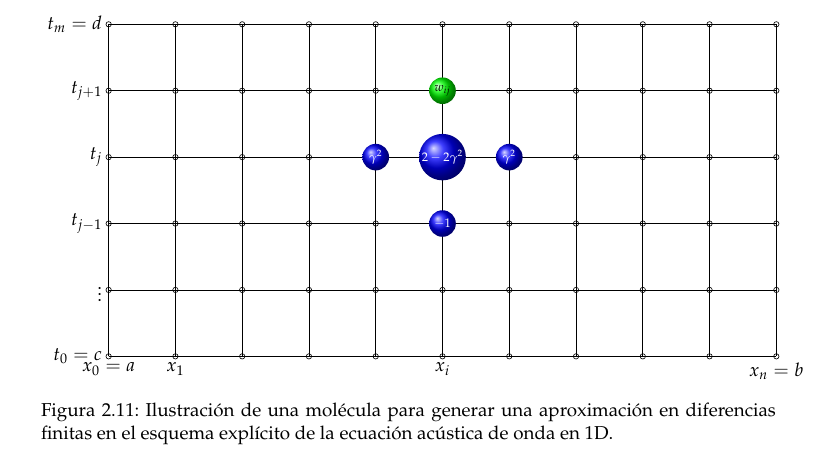

## Matrix para la ecuacion de onda CTCS
De las condiciones de frontera
$$w_{0j} = e(t_j)   \quad , \quad w_{nx j}=f(t_j) $$
Queremos encontrar los compos $w_{ij}$, $i=1, \cdots nx-1$,
$j=1,2, \cdots, nt$

Los valores con 0 en el segundo indice son condiciones iniciales


$$w_{i-1 0} = p(x_{i-1}) \quad , w_{i0} = p(x_i) = p_i \quad , \quad w_{i+1 0} = p(x_{i+1}) = p_{i+1} $$

La ecuacion (2) con $j=0$

$$w_{i 1} = \gamma_i^2 w_{i-1 0} + 2(1 - \gamma_i^2) w_{i0} + \gamma_i^2 w_{i+1 0} - w_{i, -1} + g_{i0} c_i^2 \Delta t^2 $$
Ahora recuerden la ecuacion (1a)
$$w_{i 1} = \gamma_i^2 w_{i-1 0} + 2(1 - \gamma_i^2) w_{i0} + \gamma_i^2 w_{i+1 0} - w_{i1} + 2 q_i \Delta t + g_{i0} c_i^2 \Delta t^2 \tag{3} $$

De la (3) despejamos $w_{i1}$
$$w_{i1} = \frac{\gamma_i^2}{2} p_{i-1} + (1 - \gamma_i^2) p_i + \frac{\gamma^2}{2} p_{i+1} + q_i \Delta t + \frac{g_{i0} c_i^2 \Delta t^2}{2} $$

La ecuacion (2) con $i=1$
$$w_{1 j+1} = \gamma_i^2 w_{0 j} + 2(1 - \gamma_i^2) w_{1j} + \gamma_i^2 w_{2 j} - w_{1 j-1} + g_{1j} c_1^2 \Delta t^2  $$
Reordenando

$$w_{1 j+1} = 2(1 - \gamma_1^2) w_{1j} + \gamma_1^2 w_{2j} - w_{1 j_1} + g_{1j} c_1^2 \Delta t^2 + \gamma_1^2 w_{0j} $$

El caso $i=nx-1=n-1$



$$w_{n-1 j+1} = \gamma_i^2 w_{n-2 j} + 2(1 - \gamma_i^2) w_{n-1 j} + \gamma_i^2 w_{n j} - w_{n-1 j-1} + g_{ij} c_{n-1}^2 \Delta t^2  $$
Reordenando

$$w_{n-1 j+1} = \gamma_i^2 w_{n-2 j} + 2(1 - \gamma_i^2) w_{n-1 j} +
- w_{n-1 j-1} + g_{ij} c_{n-1}^2 \Delta t^2  + \gamma_i^2 w_{n j}  $$

El sistema matricial queda.
\small
$$ \begin{pmatrix} w_{1 j+1} \\ w_{2 j+1} \\ \vdots \\ \vdots \\ w_{n-1 j+1} \end{pmatrix} =
\begin{pmatrix}
2 (1 - \gamma_1^2) & \gamma_1^2 & 0 & \cdots & \cdots & 0 \\
 \gamma_1^2 & 2(1 - \gamma_2^2) & \gamma_2^2 & \ddots & \ddots &  0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \gamma_{n-2}^2 & 2(1 - \gamma_{n-2}^2 & \gamma_{n-2}^2 \\
0 & \cdots & \cdots & 0 & \gamma_{n-1}^2 & 2(1 - \gamma_{n-1}^2
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\ w_{2j} \\ \vdots \\ \vdots \\ w_{n-1 j}
\end{pmatrix}
- \begin{pmatrix} w_{1 j-1} \\ w_{2 j-1} \\ \vdots \\ vdots \\ w_{n-1 j-1}  \end{pmatrix} + \Delta t^2
\begin{pmatrix}  g_1 c_1^2 \\ g_2 c_2^2 \\ \vdots \\ \vdots \\ g_{n-1 j } c_{n-1}^2 \end{pmatrix}
+ \begin{pmatrix} \gamma_1^2 w_{0j} \\ 0 \\ \vdots \\ 0 \\ \gamma_{n-1}^2 w_{nj} \end{pmatrix} $$

## Analisis de estabilidad
Usamos el metodo de von Neumann, donde queremos que
$|G| \le 1$ donde

$$G = \frac{w_{i j+1}}{w_{ij}} \tag{5} $$

La idea de von Neumann es escribir la solucion de la ecuacion usando el sistema de **separacion de variables** de la forma


$$u_{\omega k} = c(\omega, k) \mathrm{e}^{\mathrm{i} \omega t} \mathrm{e}^{\mathrm{i} k x} $$
Sin perdida de generalidad podemos pensar que $c(\omega, k)=1$
por que igual se cancela cuando calculemos el cociente (5)


## Acerca del fenomeno de dispersion (relacion de dispersion)
Si $u(x,t) = \mathrm{e}^{\mathrm{i} k x} \mathrm{e}^{\mathrm{i} \omega t}$

entones insertando esto en la ecuacion de onda.

$$u_{xx} = -k^2 \mathrm{e}^{\mathrm{i} kx } \mathrm{e}^{\mathrm{i} \omega t} $$
De igual forma

$$u_{tt} = -\omega^2 \mathrm{e}^{\mathrm{i} kx } \mathrm{e}^{\mathrm{i} \omega t} $$

De la ecuacion de onda con $g=0$.
$$ u_{xx} - \frac{1}{c^2} u_{tt} $$

$$-k^2 (se cancela) -\frac{1}{c^2} (-\omega^2) (se cancela) $$

$$ \frac{\omega^2}{c^2(x)} - k^2 = 0$$
o de otra forma

$$k = \pm \frac{\omega}{c(x)}$$
A esto se le llama **relacion de dispersion**.


Ahora si vamos al analisis de estabilidad

$$w_{ij} = \mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i}k x_i} $$

Esto lo debemos inyectar en la ecuacion (3)

$$\mathrm{e}^{\mathrm{i}(w t_{j+1} + k x_i) } = \gamma_i^2 \mathrm{e}^{\mathrm{i}(\omega t_j + k x_{i-1})} + 2(1 - \gamma_i)^2
\mathrm{e}^{\mathrm{i}(\omega t_j + k x_i)} + \gamma_i^2 \mathrm{e}^{\mathrm{i}(w t_j + k x_i )} - \mathrm{e}^{\mathrm{i}(\omega t_{j-1} + k x_i) } $$

Dividimos por $w_{ij}$ y queda


$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = \gamma_i^2 \mathrm{e}^{-\mathrm{i} k \Delta x} + 2(1 - \gamma^2) + \gamma_i^2 \mathrm{e}^{\mathrm{i} k \Delta x_i}- \mathrm{e}^{-\mathrm{i} \omega \Delta t}  \tag{6} $$

$G=\mathrm{e}^{\mathrm{i} \omega \Delta t}$

De la ecuacion (6) y la anterior con (recuerden)
$$\mathrm{e}^{\mathrm{i} \theta}  + \mathrm{e}^{-\mathrm{i} \theta} = 2 \cos \theta $$

Encontramos

$$ G = 2 \gamma^2 \cos k  \Delta x  + 2(1 - \gamma_i^2) - G^{-1}\tag{7} $$

Simplifiquemos los dos primeros terminos
Asumamos $\gamma= \gamma_i$


\begin{eqnarray}
2(1 - \gamma^2) + 2 \gamma^2 \cos k \Delta x &=& 2 \left [  
  (1 - \gamma^2) + \gamma^2 \cos k \Delta x \right ] \\
  &=& 2 [ 1 - \gamma^2 + \gamma^2 \left ( 1 - 2 \sin^2 \frac{k \Delta x}{2} \right )  \\
  &=& 2 \left [ 1 - 2 \gamma^2 \sin^2 \left (  \frac{k \Delta x}{2} \right )   \right ]
\end{eqnarray}



---


---



Llamemos $\beta = 1 - 2 \gamma^2 \sin^2 (k \Delta x/2)$

Tenemos entonces,multiplicando la (7) por $G$

$$G^2 - 2 \beta G + 1 = 0 $$

Resolvemos la cuadratica

$$G_{1,2} = \frac{2 \beta \pm \sqrt{4 \beta^2 -4}}{2}= \beta \pm \sqrt{\beta^2 - 1} $$

Queremos que $|G | \le 1$ y si $\beta>1$ el sistema es inestable por que $|G | > 1$.
Entonces $\beta \le 1$.


Podemos escribir (como el radical es negativo)

$$G_{1,2} = \beta \pm \mathrm{i} \sqrt{1 - \beta^2} $$

De forma que

$$| G |^2 = G G^* =  \beta^2 +1 - \beta^2 = 1$$

Ahora bien $\beta^2 < 1$,



De forma que necesitamos $|\beta| < 1$
Que significa que $|\beta| < 1$

Es decir

$$\left |  1 - 2 \gamma^2 \sin^2 \left ( \frac{k \Delta x}{2}   \right )   \right |  \le 1 $$

Esta no es la primera vez que vemos esto.
Esto lo que quiere decir es

$$2 \gamma^2 \sin^2 \left ( \frac{k \Delta x}{2}  \right ) \le 2 $$

Como $| \sin y | \le 1$, entonces requerimos que
$\gamma < 1$.  Pero $\gamma = c \Delta t/\Delta x$
Encontramos que la condicion de estabilidad es

$$ \frac{c \Delta t}{\Delta x} \le 1 $$
A esta condicion se le llama la CFL: Courant-Friedichs y Lewy.

De otra forma puede escribir

$$ \Delta t \le \Delta x/c$$.

o
$$ c < \frac{\Delta x}{\Delta t}$$                                                                                                                      

Esto tiene una interpretacion


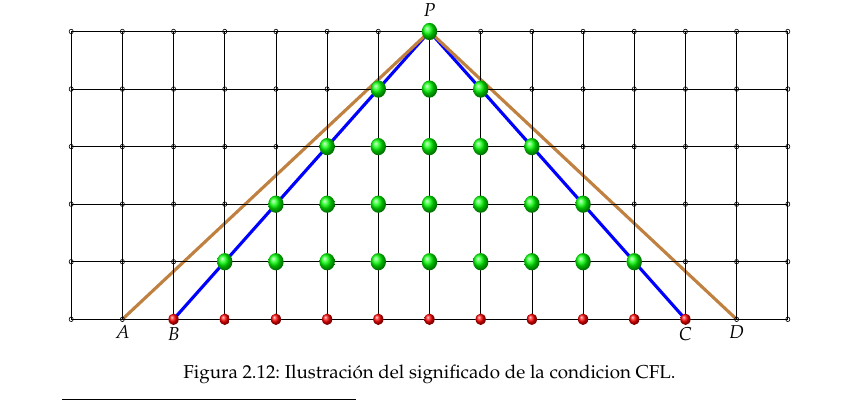